In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
import numpy as np
import pathlib

In [ ]:
images = pathlib.Path('/content/drive/MyDrive/Kaggle/DataScientest_Blood_Cells_project/Mendeley_Data_Barcelona')

In [ ]:
from tensorflow.keras.preprocessing import image_dataset_from_directory

train_data = image_dataset_from_directory(images,
                                          validation_split=0.2,
                                          subset='training',
                                         seed=123,
                                         image_size=(360,360))

Found 17092 files belonging to 8 classes.
Using 13674 files for training.


In [ ]:
for image, labels in train_data:
    print(image.shape)
    print(labels.shape)
    break

(32, 360, 360, 3)
(32,)


In [ ]:
print(train_data.class_names)

['basophil', 'eosinophil', 'erythroblast', 'ig', 'lymphocyte', 'monocyte', 'neutrophil', 'platelet']


In [ ]:
val_data= image_dataset_from_directory(images,
                                          validation_split=0.2,
                                          subset='validation',
                                         seed=123,
                                         image_size=(360,360))

Found 17092 files belonging to 8 classes.
Using 3418 files for validation.


In [ ]:
import tensorflow as tf

def normalizer(image,label):
    image = tf.cast(image/255, tf.float32)
    return image,label

train_data_norm = train_data.map(normalizer)
val_data_norm =valtrain_data.class_names_data.map(normalizer)

In [ ]:
image, label = next(iter(train_data_norm))
img1=image[0]
print('Min :%0.3f, Max: %0.3f'%(np.min(img1),np.max(img1)))

Min :0.006, Max: 1.000


In [ ]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Activation, Input, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical


model = Sequential()

model.add(Conv2D(filters=32,
                kernel_size=(3,3),
                padding='valid',
                activation='relu',
                input_shape=(360,360,3)))

model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Dropout(rate=0.5))

model.add(Flatten())

model.add(Dense(units=8, activation='softmax'))

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 358, 358, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 179, 179, 32)      0         
_________________________________________________________________
dropout (Dropout)            (None, 179, 179, 32)      0         
_________________________________________________________________
flatten (Flatten)            (None, 1025312)           0         
_________________________________________________________________
dense (Dense)                (None, 8)                 8202504   
Total params: 8,203,400
Trainable params: 8,203,400
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history=model.fit(train_data_norm,
                  validation_data= val_data,
                  epochs=5)

Epoch 1/5
428/428 [==============================] - 292s 682ms/step - loss: 3.1348 - accuracy: 0.6651 - val_loss: 87.2569 - val_accuracy: 0.7215
Epoch 2/5
428/428 [==============================] - 288s 672ms/step - loss: 0.4360 - accuracy: 0.8563 - val_loss: 129.4221 - val_accuracy: 0.7083
Epoch 3/5
428/428 [==============================] - 290s 676ms/step - loss: 0.3163 - accuracy: 0.8956 - val_loss: 176.4043 - val_accuracy: 0.6755
Epoch 4/5
428/428 [==============================] - 290s 676ms/step - loss: 0.2385 - accuracy: 0.9231 - val_loss: 225.2442 - val_accuracy: 0.6659
Epoch 5/5
428/428 [==============================] - 294s 687ms/step - loss: 0.1894 - accuracy: 0.9390 - val_loss: 224.0416 - val_accuracy: 0.7156


ValueError: x and y must have same first dimension, but have shapes (20,) and (5,)

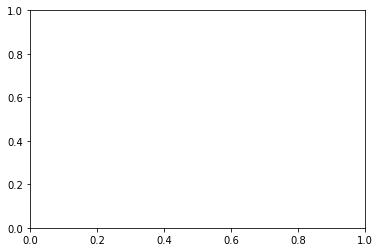

In [ ]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

import matplotlib.pyplot as plt

plt.plot(np.arange(1,21,1), train_acc, color='orange', label='Training accuracy')
plt.plot(np.arange(1,21,1), val_acc, color='green', linestyle=':', lw=3)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
;

In [ ]:
images = pathlib.Path('/content/drive/MyDrive/Kaggle/Tests/TestA')
test_data = image_dataset_from_directory(images,
                                        subset=None,
                                         seed=123,
                                         image_size=(360,360))

Found 4350 files belonging to 8 classes.


In [ ]:
test_data_norm = test_data.map(normalizer)

In [ ]:
y_pred = model.predict(test_data_norm)

In [ ]:
y_true = np.concatenate([y for x,y in test_data_norm])

In [ ]:
y_pred_class = y_pred.argmax(axis=1)

In [ ]:
pd.crosstab(y_true, y_pred_class)

NameError: name 'pd' is not defined

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_true, y_pred_class))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        89
           1       0.08      0.89      0.14       322
           2       0.00      0.00      0.00         4
           3       0.14      0.00      0.00      1034
           4       0.10      0.04      0.06       234
           5       1.00      0.00      0.00      2660
           6       0.00      0.00      0.00         4
           7       0.00      0.00      0.00         3

    accuracy                           0.07      4350
   macro avg       0.16      0.12      0.02      4350
weighted avg       0.66      0.07      0.02      4350



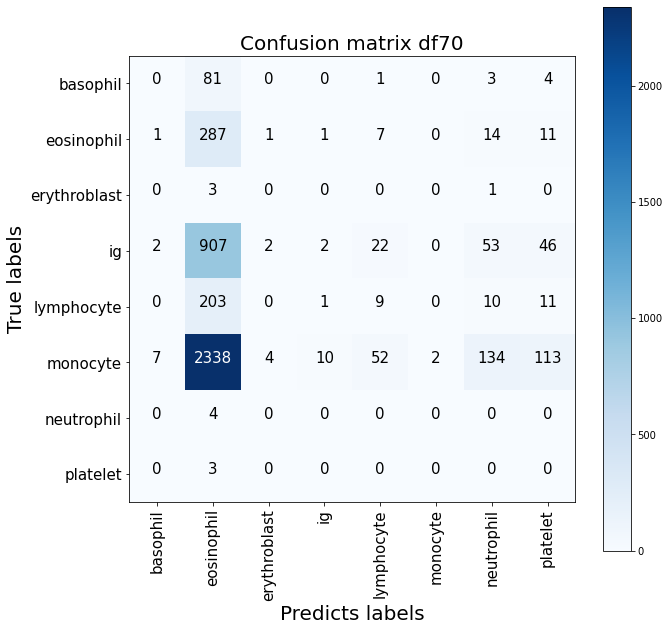

In [ ]:
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
%matplotlib inline

cnf_matrix = confusion_matrix(y_true, y_pred_class)

classes = train_data.class_names

plt.figure(figsize=(10,10))

plt.imshow(cnf_matrix, interpolation='nearest',cmap='Blues')
plt.title("Confusion matrix df70",fontsize=20)
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation =90,fontsize=15)
plt.yticks(tick_marks, classes,fontsize=15)

for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
    plt.text(j, i, cnf_matrix[i, j],
             horizontalalignment = "center",
             color = "white" if cnf_matrix[i, j] > ( cnf_matrix.max() / 2) else "black",
            fontsize=15)

plt.ylabel('True labels',fontsize=20)
plt.xlabel('Predicts labels',fontsize=20)
plt.show()